In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex = True)

In [46]:
E772_C_df = pd.read_csv('../plot_data/E772_800_CD1.dat', sep ='\s+')
E772_Ca_df = pd.read_csv('../plot_data/E772_800_CaD1.dat', sep ='\s+')
E772_Fe_df = pd.read_csv('../plot_data/E772_800_FeD1.dat', sep ='\s+')
E772_W_df = pd.read_csv('../plot_data/E772_800_WD1.dat', sep ='\s+')


#E772_C_off_df = pd.read_csv('../plot_data/E772_800_CD_off.dat', sep ='\s+')
#E772_Ca_off_df = pd.read_csv('../plot_data/E772_800_CaD_off.dat', sep ='\s+')
#E772_Fe_off_df = pd.read_csv('../plot_data/E772_800_FeD_off.dat', sep ='\s+')
#E772_W_off_df = pd.read_csv('../plot_data/E772_800_WD_off.dat', sep ='\s+')
## Check data:
#E772_C_df.head(40)

In [47]:
Qbar = 6.2
class dydata:
    def __init__(self, xdata, ydata, error, theory):
        self.xdata = xdata[(xdata/Qbar < 0.3)]
        self.ydata = ydata[(xdata/Qbar < 0.3)]
        self.error = error[(xdata/Qbar < 0.3)]
        self.theory = theory[(xdata/Qbar < 0.3)]
        self.num    = len(self.xdata)

In [48]:
class dydata2:
    def __init__(self, xdata, ydata, error):
        self.xdata = xdata
        self.ydata = ydata
        self.error = error

In [49]:
E772_C = dydata(E772_C_df['pt'], E772_C_df['DY-RATIO'], E772_C_df['error'], E772_C_df['R_dy'])

E772_Ca = dydata(E772_Ca_df['pt'], E772_Ca_df['DY-RATIO'], E772_Ca_df['error'], E772_Ca_df['R_dy'])

E772_Fe = dydata(E772_Fe_df['pt'], E772_Fe_df['DY-RATIO'], E772_Fe_df['error'], E772_Fe_df['R_dy'])

E772_W = dydata(E772_W_df['pt'], E772_W_df['DY-RATIO'], E772_W_df['error'], E772_W_df['R_dy'])

#off
#E772_C_off = dydata(E772_C_off_df['pt'], E772_C_off_df['DY-RATIO'], E772_C_off_df['error'], E772_C_off_df['R_dy'])

#E772_Ca_off = dydata(E772_Ca_off_df['pt'], E772_Ca_off_df['DY-RATIO'], E772_Ca_off_df['error'], E772_Ca_off_df['R_dy'])

#E772_Fe_off = dydata(E772_Fe_off_df['pt'], E772_Fe_off_df['DY-RATIO'], E772_Fe_off_df['error'], E772_Fe_off_df['R_dy'])

#E772_W_off = dydata(E772_W_off_df['pt'], E772_W_off_df['DY-RATIO'], E772_W_off_df['error'], E772_W_off_df['R_dy'])


In [50]:
def dyplot(axes, data, clr):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    axes.plot(data.xdata, data.theory, color = clr, label = r'\rm EPPS16')
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

In [51]:
def dyplot2(axes, data, clr):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

In [52]:
def dyplotoff(axes, data, clr):
    axes.plot(data.xdata, data.theory, color = clr, linestyle = 'dashed')
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

In [53]:
def dyplotlabel(axes, data, clr, lbl):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    axes.plot(data.xdata, data.theory, color = clr,label = lbl)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

In [54]:
def dyplotlabeloff(axes, data, clr, lbl):
    axes.plot(data.xdata, data.theory, color = clr,label = lbl, linestyle = 'dashed')
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

In [55]:
def dyplotlabel2(axes, data, clr, lbl):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = lbl)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

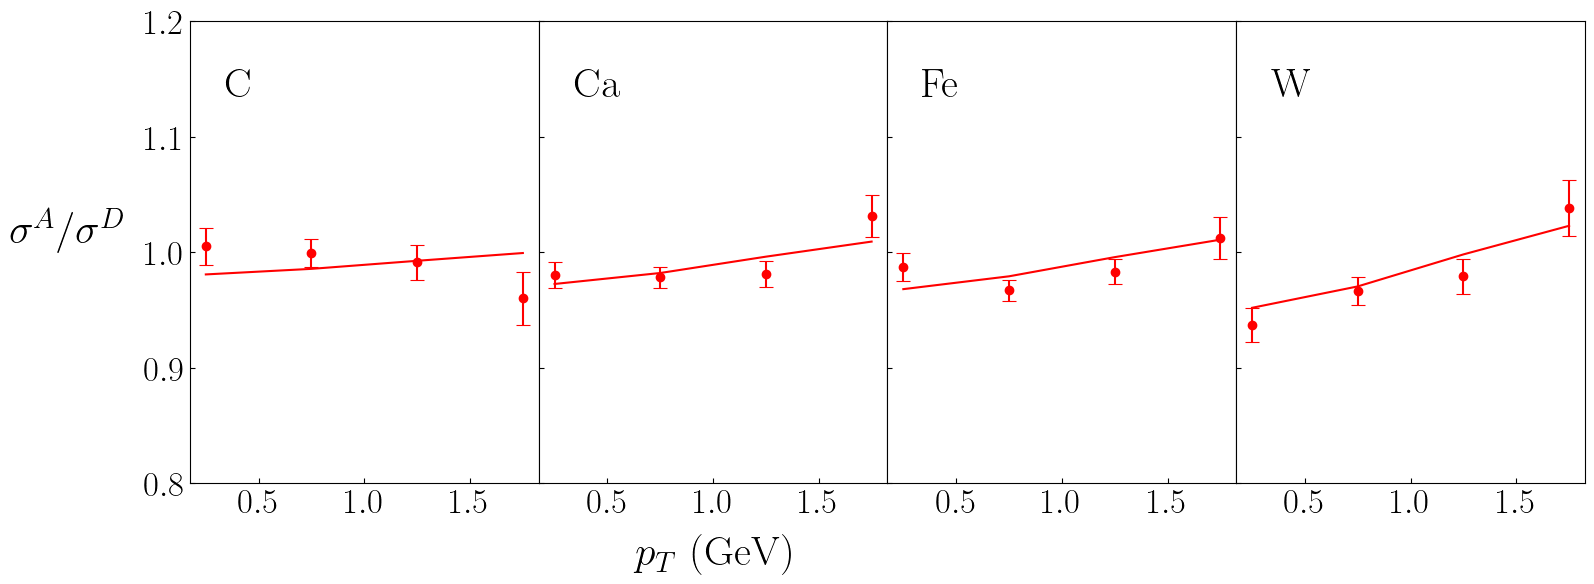

In [56]:
fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

dyplot(axs[0], E772_C, 'red')
dyplot(axs[1], E772_Ca, 'red')
dyplot(axs[2], E772_Fe, 'red')
dyplot(axs[3], E772_W, 'red')

# Set Axes Labels
axs[0].set_ylabel(r"\rm $\sigma^{A}/\sigma^{D}$", fontsize = 30,rotation = 0,labelpad = 55)
axs[1].set_xlabel(r"\rm $p_T $ (GeV)", fontsize = 30, labelpad = 10)


#axs[0].set_xlim(0,2.5)
#axs[1].set_xlim(0,2.5)
#axs[2].set_xlim(0,2.5)
#axs[3].set_xlim(0,2.5)
axs[0].set_ylim(0.8,1.2)


#Figure
fig.set_size_inches(10,10)
props = dict(boxstyle='round', facecolor='white', alpha=0)

axs[0].text(0.1, 0.9,  r"\rm C", transform=axs[0].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props)

axs[1].text(0.1, 0.9,  r"\rm Ca", transform=axs[1].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props) 
            
axs[2].text(0.1, 0.9,  r"\rm Fe", transform=axs[2].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props) 

axs[3].text(0.1, 0.9,  r"\rm W", transform=axs[3].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props) 

fig.set_size_inches(18,6)
plt.show()
fig.savefig('Drell-Yan_E772.pdf', bbox_inches = "tight")

In [57]:
#save figs
fig.savefig('Drell-Yan_E772.pdf', bbox_inches = "tight")

In [19]:
#number of data pts lost
total_data_pts = 28

#REMAINING POINTS
remaining_pts =    ( E772_C.num + E772_Ca.num + E772_Fe.num  + E772_W.num) 

cut_pts = total_data_pts - remaining_pts

print('\ntotal points without cuts is:', total_data_pts)
print('total points remaining is:   ', remaining_pts, '(', round(100*remaining_pts/total_data_pts), '%)')
print('total points cut is:         ', cut_pts, '(', round(100*cut_pts/total_data_pts), '%)')


total points without cuts is: 28
total points remaining is:    16 ( 57 %)
total points cut is:          12 ( 43 %)
